<a href="https://colab.research.google.com/github/axeltanjung/learn_rag_lllm/blob/main/langgraph/Building_Stateful_Multi_AI_Agents_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Chatbot with LangGraph

In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [6]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith_api_key = userdata.get('LANGSMITH_API_KEY')

In [7]:
import os
os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'MultiAgentLangGraph'

In [8]:
from langchain_groq import ChatGroq

In [9]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

## Start Builing Chatbot Using LangGraph

In [11]:
from typing import Annotated
from typing_extensions import TypedDict
# Create State Management
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
  # Messages have the type "list". The 'add_messages' function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [14]:
def chatbot(state:State):
  return {"messages": llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node("chatbot", chatbot)

In [18]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [20]:
graph = graph_builder.compile()

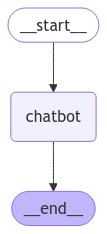

In [22]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  print(graph.draw())

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print('Good Bye')
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value['messages'].content)

User: Hallo
dict_values([{'messages': AIMessage(content='Hallo! 😊\n\nWie kann ich dir heute helfen?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 4.7e-07, 'queue_time': 0.01456965, 'total_time': 0.025455015}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f7a9669f-484c-49f9-8b19-6aef52d71616-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})}])
content='Hallo! 😊\n\nWie kann ich dir heute helfen?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 4.7e-07, 'queue_time': 0.01456965, 'total_time': 0.025455015}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-f7a9669f-484c